In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix

# PART 1

In [ ]:
# Define the ResidualBlock module
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        residual = x
        out = self.relu(self.conv1(x))
        out = self.conv2(out)
        out += residual  # Add the input to the output
        out = self.relu(out)
        return out

In [ ]:
# Define the models
class ModelWithoutResidual(nn.Module):
    def __init__(self):
        super(ModelWithoutResidual, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16 * 64 * 64, num_classes)

    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
class ModelWithResidual(nn.Module):
    def __init__(self):
        super(ModelWithResidual, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.residual1 = ResidualBlock(16, 16)
        self.residual2 = ResidualBlock(16, 16)
        self.fc = nn.Linear(16 * 64 * 64, num_classes)

    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.pool(out)
        out = self.residual1(out)
        out = self.residual2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
# Set hyperparameters
num_classes = 8
learning_rates = [0.001, 0.01]
batch_sizes = [32, 64]
num_epochs = 20

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset_path = "Micro_Organism"
dataset = ImageFolder(dataset_path, transform=transform)

# Set the sizes for train, validation, and test sets
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = dataset_size - train_size - val_size

# Split the dataset into train, validation, and test sets
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

Learning Rate: 0.001, Batch Size: 32
Epoch [1/20], Loss: 8.8537, Accuracy: 0.1618
Epoch [2/20], Loss: 2.4437, Accuracy: 0.3678
Epoch [3/20], Loss: 1.3984, Accuracy: 0.5201
Epoch [4/20], Loss: 1.0253, Accuracy: 0.7046
Epoch [5/20], Loss: 0.7335, Accuracy: 0.8089
Epoch [6/20], Loss: 0.5414, Accuracy: 0.8755
Epoch [7/20], Loss: 0.3481, Accuracy: 0.9294
Epoch [8/20], Loss: 0.2621, Accuracy: 0.9505
Epoch [9/20], Loss: 0.2112, Accuracy: 0.9572
Epoch [10/20], Loss: 0.1951, Accuracy: 0.9574
Epoch [11/20], Loss: 0.1575, Accuracy: 0.9742
Epoch [12/20], Loss: 0.1258, Accuracy: 0.9783
Epoch [13/20], Loss: 0.1489, Accuracy: 0.9797
Epoch [14/20], Loss: 0.1078, Accuracy: 0.9825
Epoch [15/20], Loss: 0.1162, Accuracy: 0.9812
Epoch [16/20], Loss: 0.0954, Accuracy: 0.9859
Epoch [17/20], Loss: 0.0953, Accuracy: 0.9825
Epoch [18/20], Loss: 0.1415, Accuracy: 0.9767
Epoch [19/20], Loss: 0.0980, Accuracy: 0.9867
Epoch [20/20], Loss: 0.0906, Accuracy: 0.9822


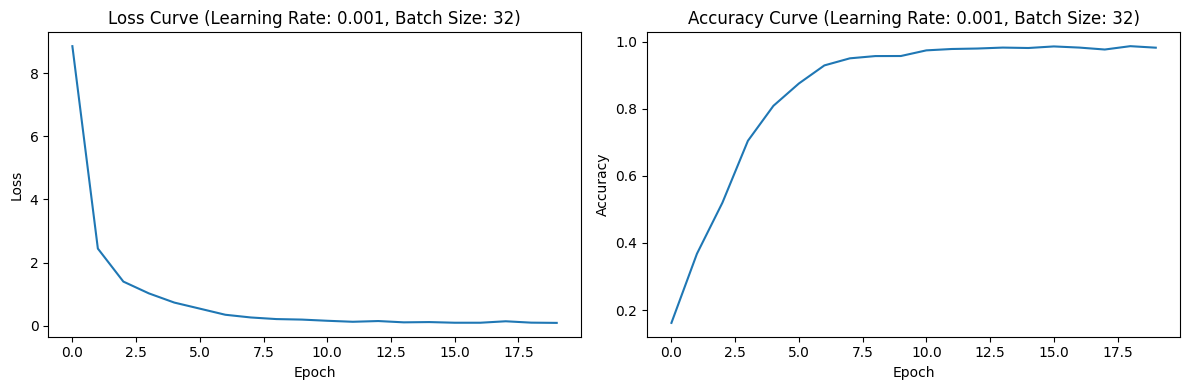

Validation Accuracy without Residual: 0.3846
Validation Accuracy with Residual: 0.3718
Learning Rate: 0.001, Batch Size: 64
Epoch [1/20], Loss: 10.9662, Accuracy: 0.1776
Epoch [2/20], Loss: 3.1648, Accuracy: 0.2952
Epoch [3/20], Loss: 1.6453, Accuracy: 0.4349
Epoch [4/20], Loss: 1.2504, Accuracy: 0.6053
Epoch [5/20], Loss: 0.8830, Accuracy: 0.7327
Epoch [6/20], Loss: 0.6637, Accuracy: 0.8021
Epoch [7/20], Loss: 0.4574, Accuracy: 0.8779
Epoch [8/20], Loss: 0.3349, Accuracy: 0.9238
Epoch [9/20], Loss: 0.3023, Accuracy: 0.9291
Epoch [10/20], Loss: 0.2457, Accuracy: 0.9425
Epoch [11/20], Loss: 0.2149, Accuracy: 0.9536
Epoch [12/20], Loss: 0.1628, Accuracy: 0.9749
Epoch [13/20], Loss: 0.1617, Accuracy: 0.9738
Epoch [14/20], Loss: 0.1615, Accuracy: 0.9705
Epoch [15/20], Loss: 0.1414, Accuracy: 0.9692
Epoch [16/20], Loss: 0.1637, Accuracy: 0.9702
Epoch [17/20], Loss: 0.1188, Accuracy: 0.9734
Epoch [18/20], Loss: 0.1277, Accuracy: 0.9717
Epoch [19/20], Loss: 0.1076, Accuracy: 0.9797
Epoch [20/

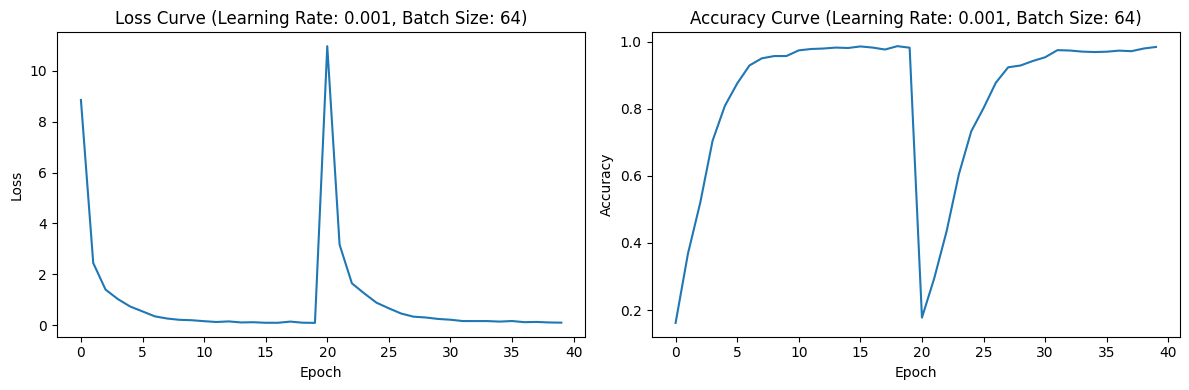

Validation Accuracy without Residual: 0.3333
Validation Accuracy with Residual: 0.3590
Learning Rate: 0.01, Batch Size: 32
Epoch [1/20], Loss: 43.9855, Accuracy: 0.1484
Epoch [2/20], Loss: 7.9216, Accuracy: 0.2529
Epoch [3/20], Loss: 3.6507, Accuracy: 0.3058
Epoch [4/20], Loss: 1.8435, Accuracy: 0.4029
Epoch [5/20], Loss: 1.4454, Accuracy: 0.4977
Epoch [6/20], Loss: 1.3265, Accuracy: 0.5214
Epoch [7/20], Loss: 1.2931, Accuracy: 0.5329
Epoch [8/20], Loss: 1.2249, Accuracy: 0.5556
Epoch [9/20], Loss: 1.1829, Accuracy: 0.5559
Epoch [10/20], Loss: 1.1735, Accuracy: 0.5645
Epoch [11/20], Loss: 1.1570, Accuracy: 0.5731
Epoch [12/20], Loss: 1.1326, Accuracy: 0.5786
Epoch [13/20], Loss: 1.1354, Accuracy: 0.5773
Epoch [14/20], Loss: 1.1186, Accuracy: 0.5811
Epoch [15/20], Loss: 1.1126, Accuracy: 0.5839
Epoch [16/20], Loss: 1.1009, Accuracy: 0.5862
Epoch [17/20], Loss: 1.0925, Accuracy: 0.5864
Epoch [18/20], Loss: 1.1054, Accuracy: 0.5887
Epoch [19/20], Loss: 1.1022, Accuracy: 0.5889
Epoch [20/2

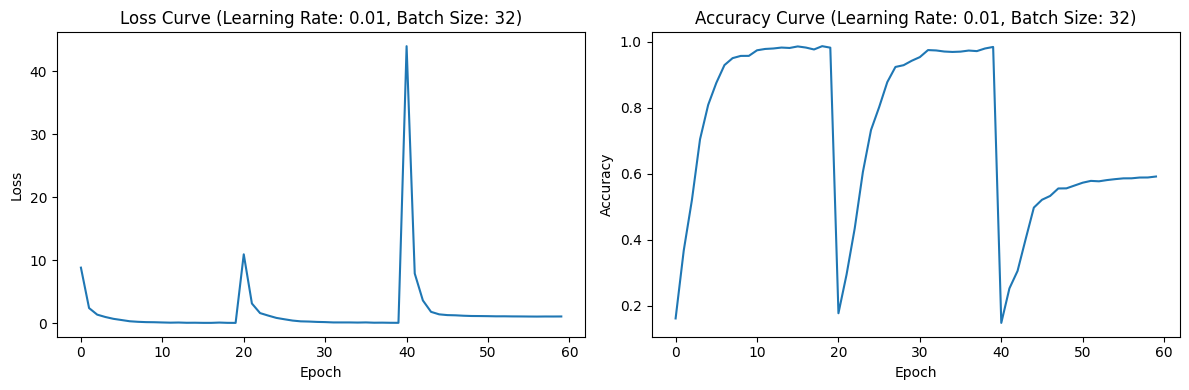

Validation Accuracy without Residual: 0.3590
Validation Accuracy with Residual: 0.2436
Learning Rate: 0.01, Batch Size: 64
Epoch [1/20], Loss: 39.5252, Accuracy: 0.1718
Epoch [2/20], Loss: 8.4330, Accuracy: 0.2710
Epoch [3/20], Loss: 3.2570, Accuracy: 0.3499
Epoch [4/20], Loss: 1.9314, Accuracy: 0.4300
Epoch [5/20], Loss: 1.3877, Accuracy: 0.5050
Epoch [6/20], Loss: 1.2902, Accuracy: 0.5314
Epoch [7/20], Loss: 1.2018, Accuracy: 0.5559
Epoch [8/20], Loss: 1.1762, Accuracy: 0.5592
Epoch [9/20], Loss: 1.1594, Accuracy: 0.5694
Epoch [10/20], Loss: 1.1551, Accuracy: 0.5698
Epoch [11/20], Loss: 1.1361, Accuracy: 0.5775
Epoch [12/20], Loss: 1.1188, Accuracy: 0.5806
Epoch [13/20], Loss: 1.1168, Accuracy: 0.5853
Epoch [14/20], Loss: 1.1113, Accuracy: 0.5870
Epoch [15/20], Loss: 1.1381, Accuracy: 0.5864
Epoch [16/20], Loss: 1.1296, Accuracy: 0.5825
Epoch [17/20], Loss: 1.0967, Accuracy: 0.5839
Epoch [18/20], Loss: 1.1198, Accuracy: 0.5914
Epoch [19/20], Loss: 1.0954, Accuracy: 0.5882
Epoch [20/2

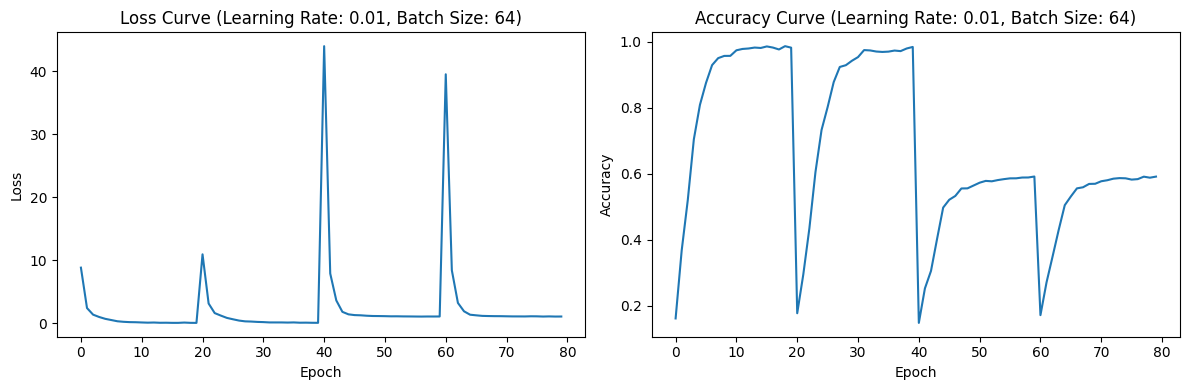

Validation Accuracy without Residual: 0.3974
Validation Accuracy with Residual: 0.2436
Best Model Test Accuracy: 0.3000


In [3]:
# Create data loaders
batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Initialize lists for loss and accuracy
losses = []
accuracies = []

best_model = None
best_val_accuracy = 0.0

# Iterate over different learning rates
for learning_rate in learning_rates:
    # Iterate over different batch sizes
    for batch_size in batch_sizes:
        print(f"Learning Rate: {learning_rate}, Batch Size: {batch_size}")
        
        # Instantiate the models
        model_without_residual = ModelWithoutResidual().to(device)
        model_with_residual = ModelWithResidual().to(device)
        
        # Define the optimizers
        optimizer_without_residual = optim.Adam(model_without_residual.parameters(), lr=learning_rate)
        optimizer_with_residual = optim.Adam(model_with_residual.parameters(), lr=learning_rate)
        
        # Training loop
        for epoch in range(num_epochs):
            # Set models to training mode
            model_without_residual.train()
            model_with_residual.train()

            running_loss = 0.0
            running_accuracy = 0.0

            for inputs, labels in train_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the gradients
                optimizer_without_residual.zero_grad()
                optimizer_with_residual.zero_grad()

                # Forward pass without residual
                outputs_without_residual = model_without_residual(inputs)
                loss_without_residual = criterion(outputs_without_residual, labels)
                accuracy_without_residual = calculate_accuracy(outputs_without_residual, labels)

                # Backward pass without residual
                loss_without_residual.backward()
                optimizer_without_residual.step()

                # Forward pass with residual
                outputs_with_residual = model_with_residual(inputs)
                loss_with_residual = criterion(outputs_with_residual, labels)
                accuracy_with_residual = calculate_accuracy(outputs_with_residual, labels)

                # Backward pass with residual
                loss_with_residual.backward()
                optimizer_with_residual.step()

                # Accumulate the loss and accuracy
                running_loss += (loss_without_residual.item() + loss_with_residual.item()) / 2
                running_accuracy += (accuracy_without_residual + accuracy_with_residual) / 2

            # Calculate average loss and accuracy for epoch
            epoch_loss = running_loss / len(train_loader)
            epoch_accuracy = running_accuracy / len(train_loader)

            # Print epoch statistics
            print("Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.4f}".format(epoch+1, num_epochs, epoch_loss, epoch_accuracy))

            # Append loss and accuracy for plotting
            losses.append(epoch_loss)
            accuracies.append(epoch_accuracy)

        # Plot the loss and accuracy curves
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss Curve (Learning Rate: {}, Batch Size: {})".format(learning_rate, batch_size))
        plt.subplot(1, 2, 2)
        plt.plot(accuracies)
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title("Accuracy Curve (Learning Rate: {}, Batch Size: {})".format(learning_rate, batch_size))
        plt.tight_layout()
        plt.show()

        # Evaluate on the test set
        model_without_residual.eval()
        model_with_residual.eval()

        with torch.no_grad():
            total_correct_without_residual = 0
            total_correct_with_residual = 0
            total_samples = 0

            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs_without_residual = model_without_residual(inputs)
                _, predicted_without_residual = torch.max(outputs_without_residual, 1)
                total_correct_without_residual += (predicted_without_residual == labels).sum().item()

                outputs_with_residual = model_with_residual(inputs)
                _, predicted_with_residual = torch.max(outputs_with_residual, 1)
                total_correct_with_residual += (predicted_with_residual == labels).sum().item()

                total_samples += labels.size(0)

            val_accuracy_without_residual = total_correct_without_residual / total_samples
            val_accuracy_with_residual = total_correct_with_residual / total_samples

            print("Validation Accuracy without Residual: {:.4f}".format(val_accuracy_without_residual))
            print("Validation Accuracy with Residual: {:.4f}".format(val_accuracy_with_residual))
            
            # Check if current model has better validation accuracy than the best model so far
            if val_accuracy_with_residual > best_val_accuracy:
                best_val_accuracy = val_accuracy_with_residual
                best_model = model_with_residual

# Evaluate the best model on the test set
best_model.eval()

with torch.no_grad():
    total_correct = 0
    total_samples = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()

        total_samples += labels.size(0)

    test_accuracy = total_correct / total_samples

print("Best Model Test Accuracy: {:.4f}".format(test_accuracy))

In [4]:
print("Best Model Type:", type(best_model))


Best Model Type: <class '__main__.ModelWithResidual'>


#
Plot a confusion matrix for your best model’s predictions.

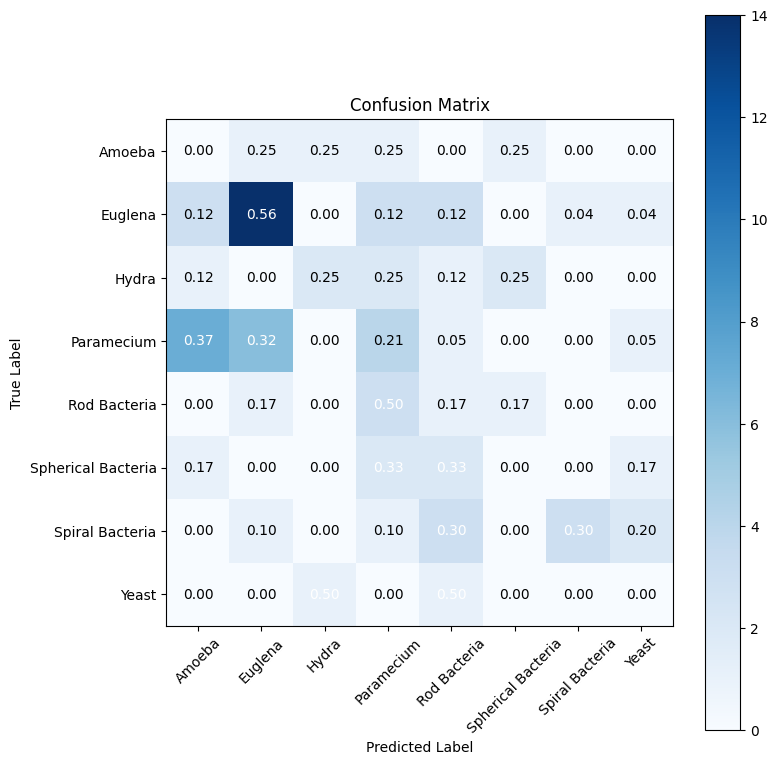

In [6]:
# Set the model to evaluation mode
best_model.eval()

with torch.no_grad():
    all_labels = []
    all_predictions = []

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calculate the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
classes = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod Bacteria', 'Spherical Bacteria', 'Spiral Bacteria', 'Yeast']
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.2f'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# PART 2


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import matplotlib.pyplot as plt


In [12]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_path = "Micro_Organism"
dataset = ImageFolder(dataset_path, transform=transform)

# Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


In [18]:
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes = 8

# Modify the last layer
model.fc = nn.Linear(num_features, num_classes)

for param in model.fc.parameters():
    param.requires_grad_(True)

# Move the model to the device
model = model.to(device)


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


Epoch 1/20:
Train Loss: 2.0138 | Train Accuracy: 0.2298
Val Loss: 1.8722 | Val Accuracy: 0.3590
--------------------------------------------------
Epoch 2/20:
Train Loss: 1.5791 | Train Accuracy: 0.4390
Val Loss: 1.5653 | Val Accuracy: 0.4487
--------------------------------------------------
Epoch 3/20:
Train Loss: 1.3082 | Train Accuracy: 0.5895
Val Loss: 1.3775 | Val Accuracy: 0.6154
--------------------------------------------------
Epoch 4/20:
Train Loss: 1.1479 | Train Accuracy: 0.6767
Val Loss: 1.2749 | Val Accuracy: 0.6410
--------------------------------------------------
Epoch 5/20:
Train Loss: 1.0538 | Train Accuracy: 0.6656
Val Loss: 1.2179 | Val Accuracy: 0.7179
--------------------------------------------------
Epoch 6/20:
Train Loss: 0.9588 | Train Accuracy: 0.7132
Val Loss: 1.1646 | Val Accuracy: 0.6667
--------------------------------------------------
Epoch 7/20:
Train Loss: 0.8888 | Train Accuracy: 0.7274
Val Loss: 1.1282 | Val Accuracy: 0.6538
----------------------

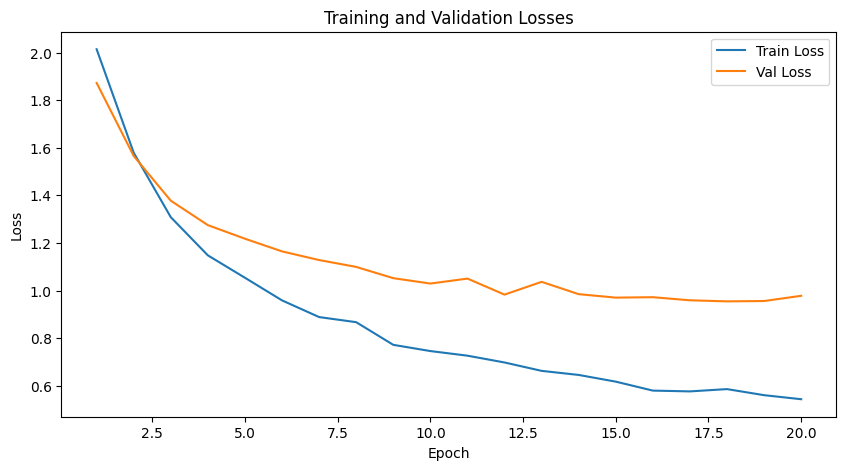

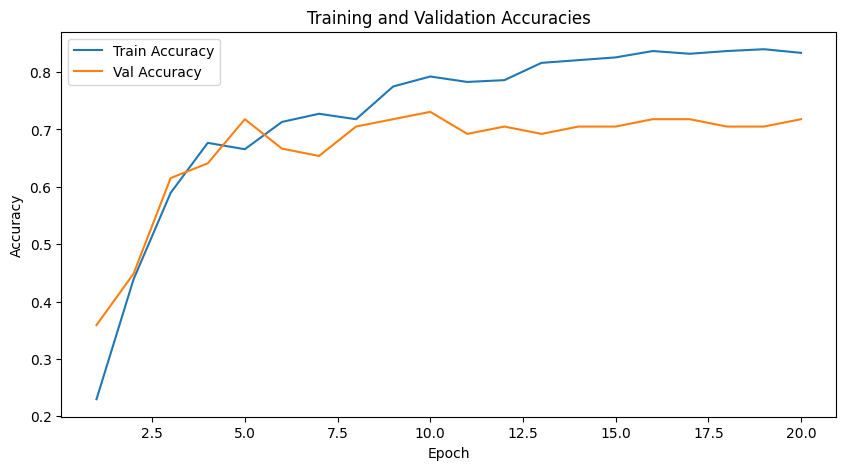

In [20]:
num_epochs = 20

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = train_correct / train_total
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    val_total = 0
    val_correct = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = val_correct / val_total
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    # Print epoch statistics
    print(f"Epoch {epoch + 1}/{num_epochs}:")
    print(f"Train Loss: {train_losses[-1]:.4f} | Train Accuracy: {train_accuracies[-1]:.4f}")
    print(f"Val Loss: {val_losses[-1]:.4f} | Val Accuracy: {val_accuracies[-1]:.4f}")
    print("-" * 50)

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()

# Plot the training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, num_epochs + 1), val_accuracies, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracies")
plt.legend()
plt.show()


In [21]:
model.eval()
test_total = 0
test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7000


###
 2. Explore training with two different cases; train only FC layer and freeze rest, train last two convolutional layers and FC layer and freeze rest. Tune your parameters accordingly and give accuracy on validation set and test set. Compare and analyze your results. Give relevent code snippet.

In [23]:
# Load pre-trained ResNet-18
model = models.resnet18(pretrained=True)

num_epochs = 10

# Case 1: Train only the FC layer and freeze the rest
for param in model.parameters():
    param.requires_grad = False

# Modify the last layer for the new task
num_features = model.fc.in_features
num_classes = 10  # Number of classes in the new task
model.fc = nn.Linear(num_features, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    # Training
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    val_accuracy_fc = total_correct / total_samples
    print(f"Validation Accuracy (Case 1): {val_accuracy_fc}")

# Case 2: Train the last two convolutional layers and the FC layer and freeze the rest
for name, param in model.named_parameters():
    if 'layer4' in name or 'fc' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    # Training
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    val_accuracy_conv_fc = total_correct / total_samples
    print(f"Validation Accuracy (Case 2): {val_accuracy_conv_fc}")

# Evaluate on the test set
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

test_accuracy = total_correct / total_samples
print(f"Test Accuracy: {test_accuracy}")


Validation Accuracy (Case 1): 0.46153846153846156
Validation Accuracy (Case 1): 0.5769230769230769
Validation Accuracy (Case 1): 0.6025641025641025
Validation Accuracy (Case 1): 0.6410256410256411
Validation Accuracy (Case 1): 0.6538461538461539
Validation Accuracy (Case 1): 0.6666666666666666
Validation Accuracy (Case 1): 0.6410256410256411
Validation Accuracy (Case 1): 0.6538461538461539
Validation Accuracy (Case 1): 0.6794871794871795
Validation Accuracy (Case 1): 0.6923076923076923
Validation Accuracy (Case 2): 0.6794871794871795
Validation Accuracy (Case 2): 0.6794871794871795
Validation Accuracy (Case 2): 0.7307692307692307
Validation Accuracy (Case 2): 0.7692307692307693
Validation Accuracy (Case 2): 0.7307692307692307
Validation Accuracy (Case 2): 0.6923076923076923
Validation Accuracy (Case 2): 0.7307692307692307
Validation Accuracy (Case 2): 0.6538461538461539
Validation Accuracy (Case 2): 0.7051282051282052
Validation Accuracy (Case 2): 0.7692307692307693
Test Accuracy: 0.62

### 
3. Plot confusion matrix for your best model and analyze results.



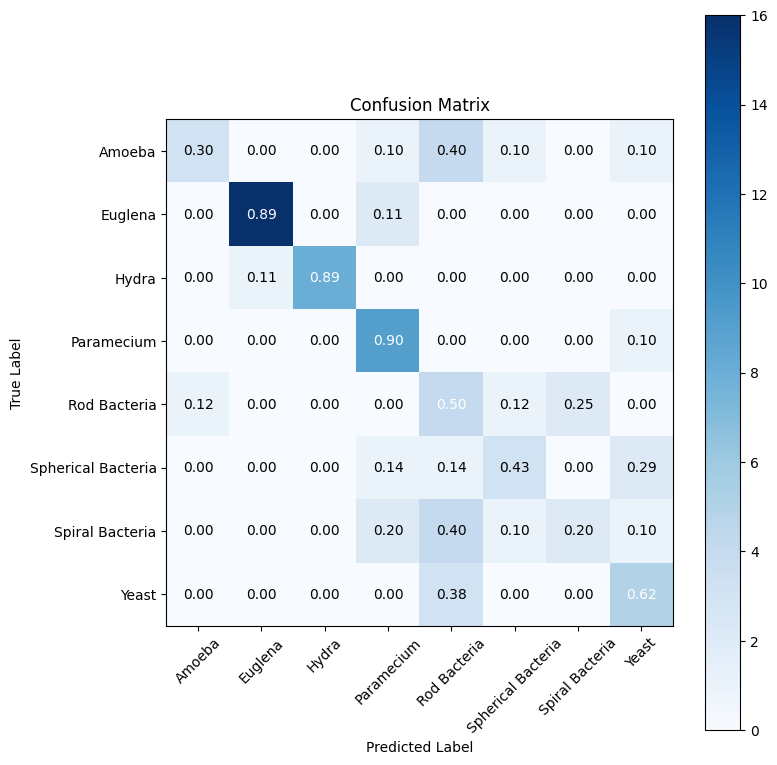

In [26]:
# Get predictions for the test set
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
classes = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod Bacteria', 'Spherical Bacteria', 'Spiral Bacteria', 'Yeast']
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.2f'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

